## Regression Analysis - OLS, Ridge, Lasso, Elasticnet

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading and processing the dataset

In [2]:
# Loading the dataset

boston = datasets.load_boston()

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
np.shape(boston.data)

(506, 13)

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
boston_df['House_price'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
x = boston_df.drop('House_price', axis = 1)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
y = boston_df['House_price']
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: House_price, dtype: float64

In [13]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 1)
print("Training data {}".format(train_x.shape))
print("Test data {}".format(test_x.shape))
print("Training y data {}".format(train_y.shape))
print("Testing y data {}".format(test_y.shape))

Training data (354, 13)
Test data (152, 13)
Training y data (354,)
Testing y data (152,)


## Creating the models and evaluating performance

In [14]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
lm_ridge = Ridge()
lm_ridge

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [16]:
lm_lasso = Lasso()
lm_lasso

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [17]:
lm_elasticnet = ElasticNet()
lm_elasticnet

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [18]:
lm.fit(train_x, train_y)
lm_ridge.fit(train_x, train_y)
lm_lasso.fit(train_x, train_y)
lm_elasticnet.fit(train_x, train_y)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

### Feature importance 

We plot the coefficient value of the different predictors. 

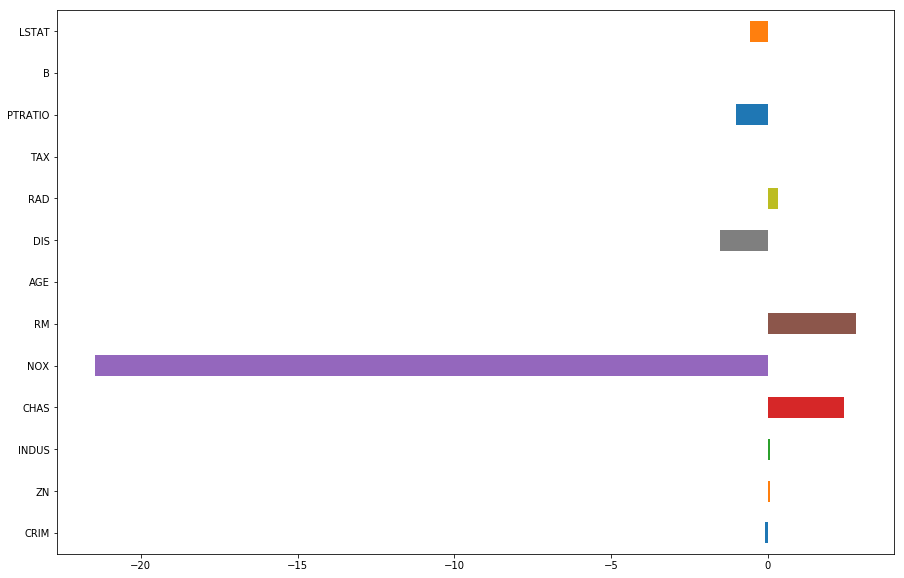

In [19]:
plt.figure(figsize=(15,10))
ft_importance_lm = pd.Series(lm.coef_, index=x.columns)
ft_importance_lm.plot(kind='barh')
plt.show()

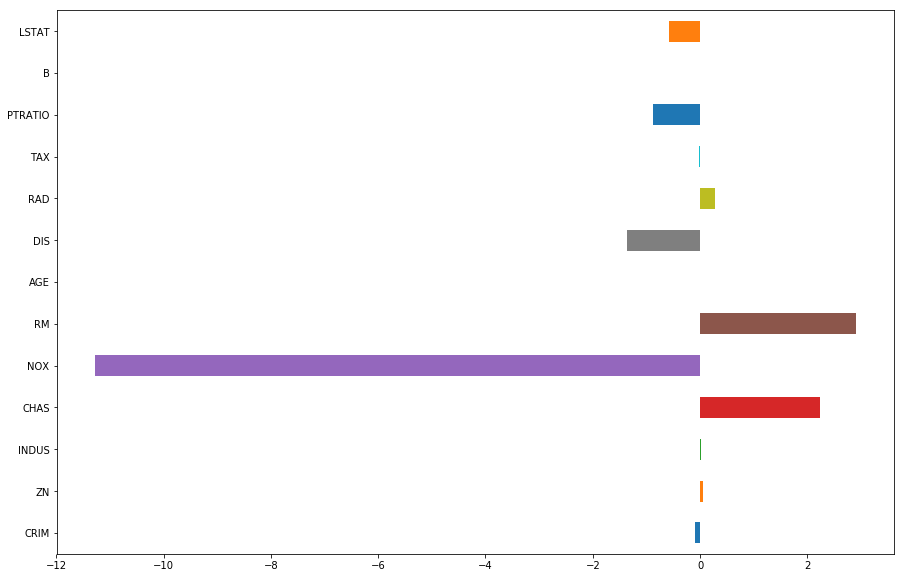

In [20]:
plt.figure(figsize=(15,10))
ft_importance_lm = pd.Series(lm_ridge.coef_, index=x.columns)
ft_importance_lm.plot(kind='barh')
plt.show()

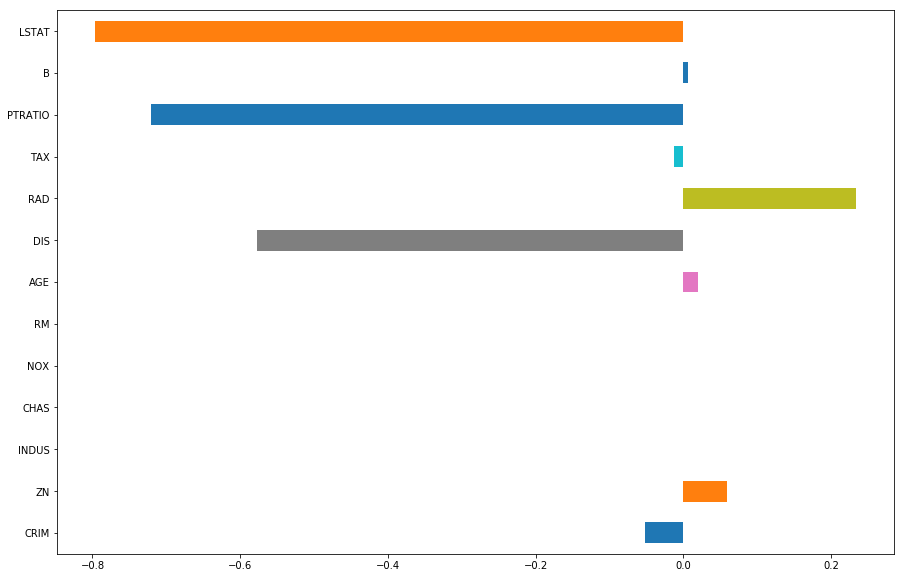

In [21]:
plt.figure(figsize=(15,10))
ft_importance_lm = pd.Series(lm_lasso.coef_, index=x.columns)
ft_importance_lm.plot(kind='barh')
plt.show()

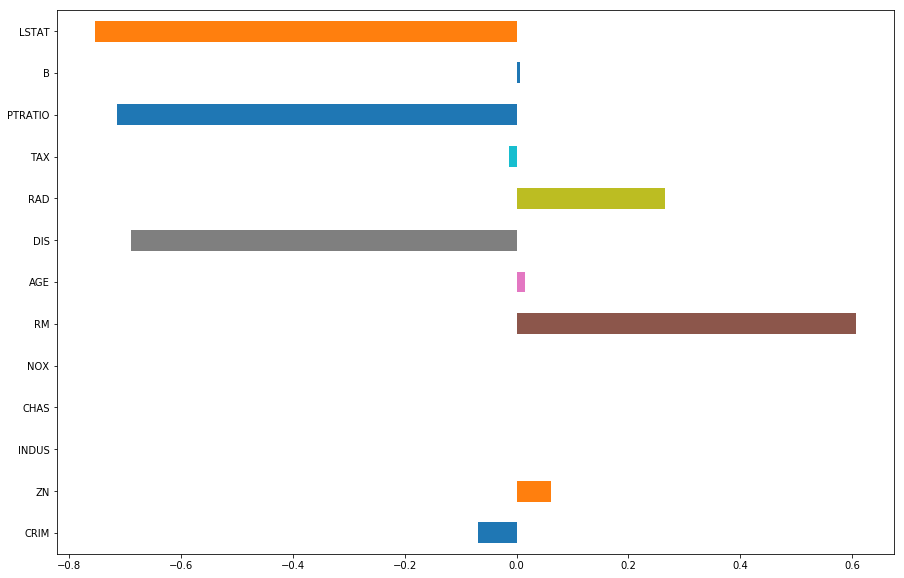

In [22]:
plt.figure(figsize=(15,10))
ft_importance_lm = pd.Series(lm_elasticnet.coef_, index=x.columns)
ft_importance_lm.plot(kind='barh')
plt.show()

In [23]:
print("RSquare value for OLS is  {}".format(np.round(lm.score(test_x, test_y)*100,2)))
print("RSquare value for Ridge is  {}".format(np.round(lm_ridge.score(test_x, test_y)*100,2)))
print("RSquare value for Lasso is  {}".format(np.round(lm_lasso.score(test_x, test_y)*100,2)))
print("RSquare value for ElasticNet is  {}".format(np.round(lm_elasticnet.score(test_x, test_y)*100,2)))

RSquare value for OLS is  78.36
RSquare value for Ridge is  78.91
RSquare value for Lasso is  66.95
RSquare value for ElasticNet is  69.98


Higher the value of the R2 value is preferred.  

In [24]:
pred_lm = lm.predict(test_x)
pred_lm_ridge= lm_ridge.predict(test_x)
pred_lm_lasso = lm_lasso.predict(test_x)
pred_lm_elasticnet = lm_elasticnet.predict(test_x)

In [25]:
print("MSE of OLS is {}".format(metrics.mean_squared_error(test_y, pred_lm)))
print("MSE of Ridge is {}".format(metrics.mean_squared_error(test_y, pred_lm_ridge)))
print("MSE of Lasso is {}".format(metrics.mean_squared_error(test_y, pred_lm_lasso)))
print("MSE of ElasticNet is {}".format(metrics.mean_squared_error(test_y, pred_lm_elasticnet)))

MSE of OLS is 19.831323672063345
MSE of Ridge is 19.334416287843634
MSE of Lasso is 30.293798221967176
MSE of ElasticNet is 27.513171154748665


Ridge is best model among other ones based on R2 and MSE values! 